# Libraries

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import missingno as msno
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.neighbors import LocalOutlierFactor
from lightgbm import LGBMRegressor
import re

In [117]:
#Read the Data
df=pd.read_csv('E:\\Kaggle\\Hitters\\Hitters.csv')

In [118]:
data=df.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


# DATA UNDERSTANDING

In [119]:
def data_understanding(df):
    print('############shape##############')
    print(df.shape)
    print('############types##############')
    print(df.dtypes)
    print('############head###############')
    print(df.head())
    print('############info###############')
    print(df.info())
    print('############nunique###############')
    print(df.nunique())

In [5]:
# There are 322 observations and int-float-object types of features in this data set
data_understanding(df)

############shape##############
(322, 20)
############types##############
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
############head###############
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    10

In [120]:
print("Num of Object Variables:", df.select_dtypes(object).shape[1])
print("Num of Integer Variables:", df.select_dtypes("integer").shape[1])
print("Num of Float Variables:", df.select_dtypes("float").shape[1])

Num of Object Variables: 3
Num of Integer Variables: 16
Num of Float Variables: 1


In [121]:
df["League"].value_counts()

A    175
N    147
Name: League, dtype: int64

<AxesSubplot:>

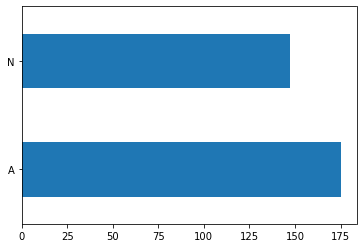

In [122]:
df["League"].value_counts().plot.barh()

In [123]:
df["NewLeague"].value_counts()

A    176
N    146
Name: NewLeague, dtype: int64

<AxesSubplot:>

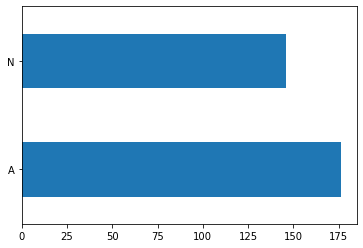

In [124]:
df["NewLeague"].value_counts().plot.barh()

In [125]:
df["Division"].value_counts()

W    165
E    157
Name: Division, dtype: int64

<AxesSubplot:>

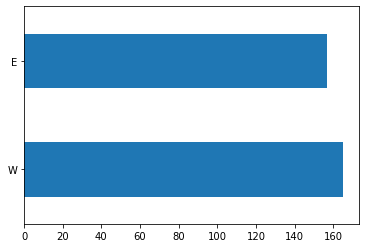

In [126]:
df["Division"].value_counts().plot.barh()

<AxesSubplot:xlabel='Salary', ylabel='Density'>

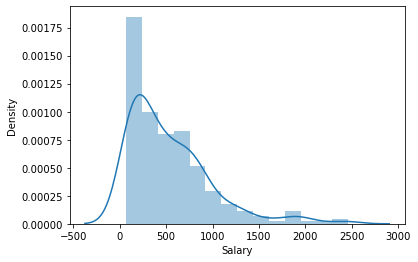

In [127]:
sns.distplot(df['Salary'])

In [128]:
#If the missing values don't come from Salary(target feature), i would have thought to assign mean according to these results.
# Because, there seems to be a relation between categoric variables and Salary values for example there is an important differences between being E Division and W Devision.
print("New League= A" ,df[df["NewLeague"]=="A"].agg({"Salary":"mean"}))
print("New League= N" ,df[df["NewLeague"]=="N"].agg({"Salary":"mean"}))
print("League= A" ,df[df["League"]=="A"].agg({"Salary":"mean"}))
print("League= N" ,df[df["League"]=="N"].agg({"Salary":"mean"}))
print("Division= E" ,df[df["Division"]=="E"].agg({"Salary":"mean"}))
print("Division= W" ,df[df["Division"]=="W"].agg({"Salary":"mean"}))

New League= A Salary    537.113028
dtype: float64
New League= N Salary    534.553852
dtype: float64
League= A Salary    541.999547
dtype: float64
League= N Salary    529.1175
dtype: float64
Division= E Salary    624.271364
dtype: float64
Division= W Salary    450.876873
dtype: float64


# Data Preprocessing

In [129]:
#There are 59 null values in Hitters data set
df.isnull().sum().sum()

59

In [130]:
# All these NA values comes from "Salary" feature
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [131]:
df[df.Salary.isnull()==True].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A


<AxesSubplot:>

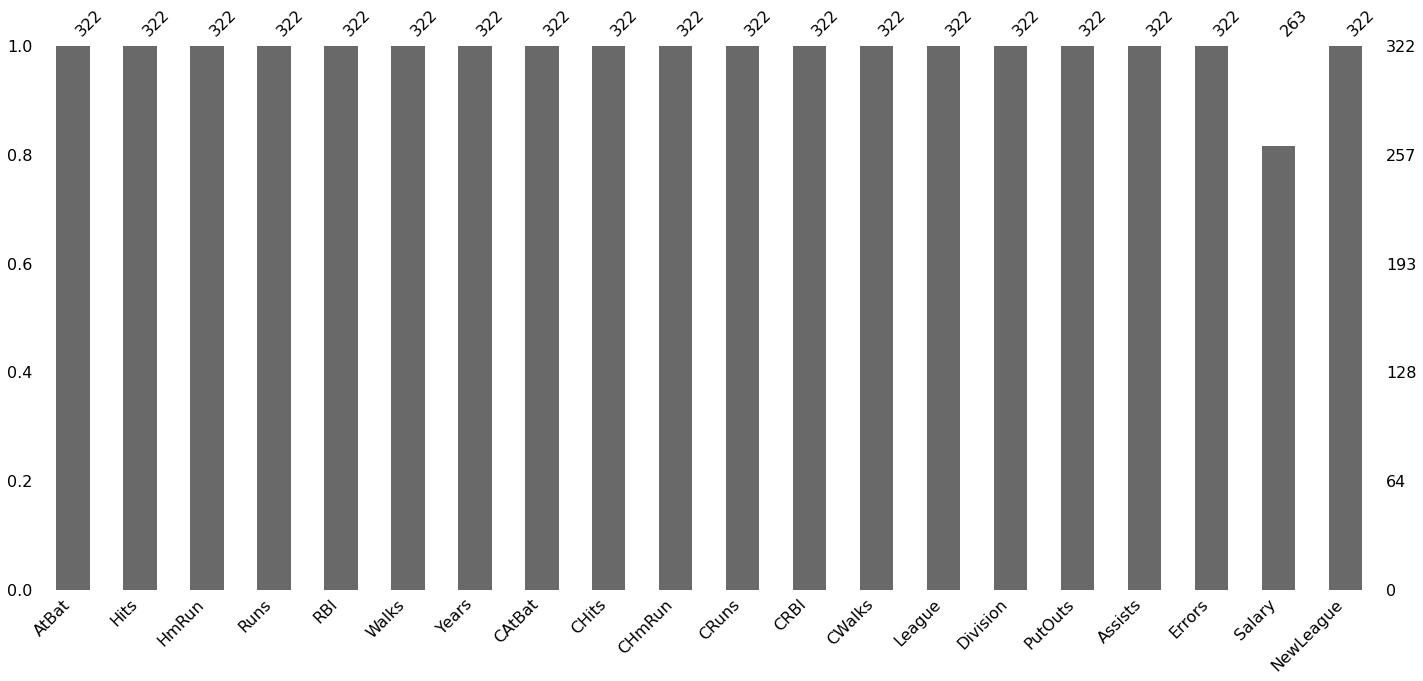

In [132]:
msno.bar(df)

# Outliers

In [133]:
#Statistical view for all features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [134]:
# Descriptive Analysis
df.describe([0.05,0.25,0.50,0.75,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
AtBat,322.0,380.928571,153.404981,16.0,161.00,255.25,379.5,512.00,609.90,658.59000,687.0
Hits,322.0,101.024845,46.454741,1.0,39.00,64.00,96.0,137.00,174.00,210.79000,238.0
HmRun,322.0,10.770186,8.709037,0.0,0.00,4.00,8.0,16.00,28.95,33.00000,40.0
Runs,322.0,50.909938,26.024095,0.0,17.00,30.25,48.0,69.00,94.00,107.79000,130.0
RBI,322.0,48.027950,26.166895,0.0,14.00,28.00,44.0,64.75,96.00,112.37000,121.0
Walks,322.0,38.742236,21.639327,0.0,11.05,22.00,35.0,53.00,78.00,93.58000,105.0
Years,322.0,7.444099,4.926087,1.0,1.00,4.00,6.0,11.00,17.00,19.79000,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,216.50,816.75,1928.0,3924.25,7125.60,8749.97000,14053.0
CHits,322.0,717.571429,654.472627,4.0,54.00,209.00,508.0,1059.25,2017.15,2500.34000,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,2.00,14.00,37.5,90.00,265.65,373.12000,548.0


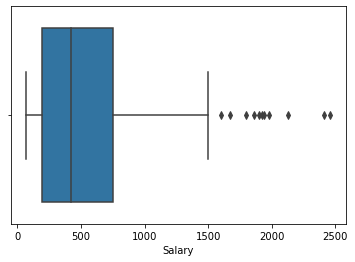

In [135]:
sns.boxplot(x = df["Salary"])
plt.show()

In [136]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [137]:
#When the quarters of 1% and quartiles of 99% were examined first, no outlier was found.
lower, upper=outlier_thresholds(df, 'Salary', q1=0.01, q3=0.99)
print(df[(df['Salary']<lower) | (df['Salary']>upper)].shape[0])

0


In [138]:
#Then, when the quarters of 25% and quarters of 75% were examined, an outlier was found.
#Conclusion: Observation analysis against the dependent variable is applied according to quartiles of 25 and 75. 
#Business sector information may remain untouched.
lower, upper=outlier_thresholds(df, 'Salary', q1=0.25, q3=0.75)
print(df[(df['Salary']<lower) | (df['Salary']>upper)].shape[0])

11


In [139]:
#Later, when quarters of 5% and quarters of 95% were examined, no outlier was found.
lower, upper=outlier_thresholds(df, 'Salary')
print(df[(df['Salary']<lower) | (df['Salary']>upper)].shape[0])

0


In [140]:
# numerical variables
def numeric_cols(df):
    numeric_cols = [col for col in df.columns if df[col].dtypes != "O"]
    return numeric_cols

In [141]:
#Here, how many outlier observations in all variables in quartiles of 25 and 75 are accessed.
for col in numeric_cols(df):
    lower, upper=outlier_thresholds(df, col, 0.25, 0.75)
    count=df[(df[col]<lower) | (df[col]>upper)].shape[0]
    if count!=0:
        print(col, 'yes')
        print(count)
    else:
        print(col, 'no')

AtBat no
Hits no
HmRun yes
2
Runs yes
1
RBI yes
1
Walks yes
1
Years yes
2
CAtBat yes
5
CHits yes
6
CHmRun yes
32
CRuns yes
5
CRBI yes
26
CWalks yes
20
PutOuts yes
36
Assists yes
23
Errors yes
9
Salary yes
11


In [142]:
def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if low_limit > 0:
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    else:
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
        
    return dataframe

In [143]:
df=replace_with_thresholds(df, 'Salary')

<AxesSubplot:xlabel='Salary'>

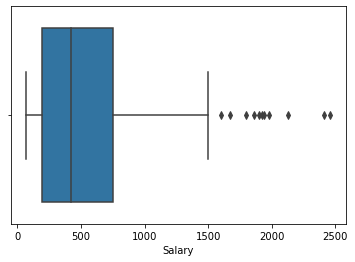

In [144]:
sns.boxplot(df['Salary'])

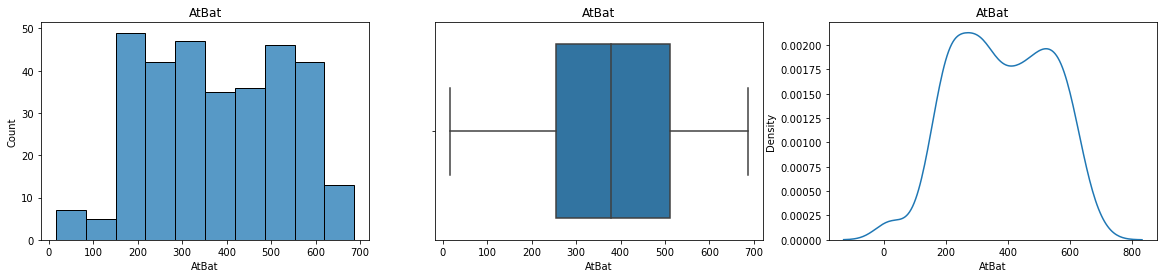

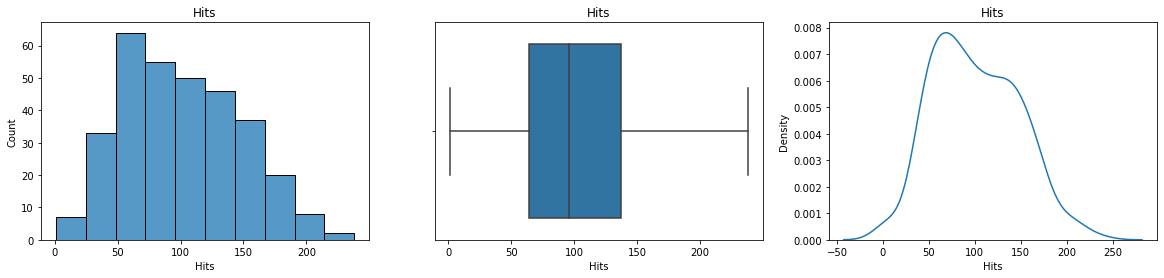

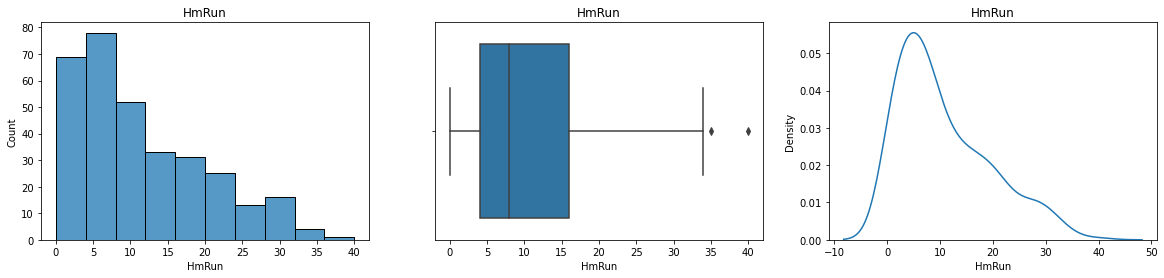

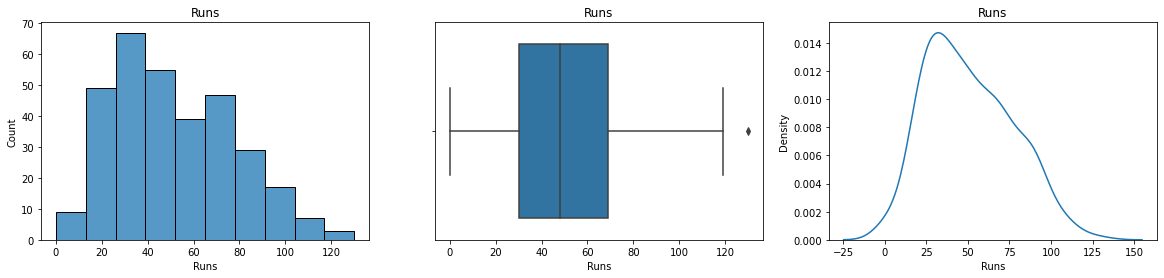

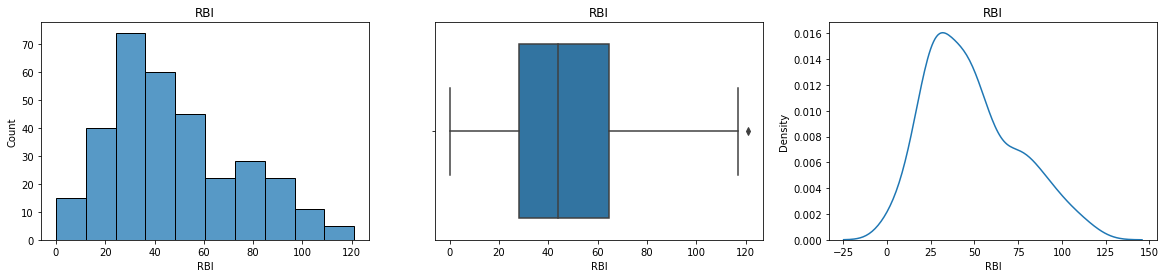

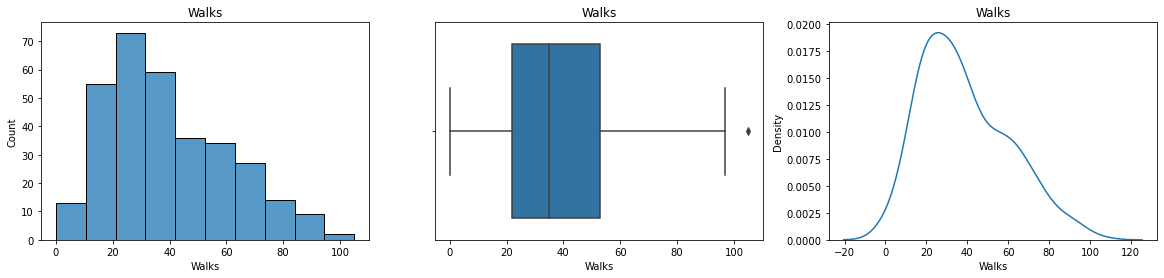

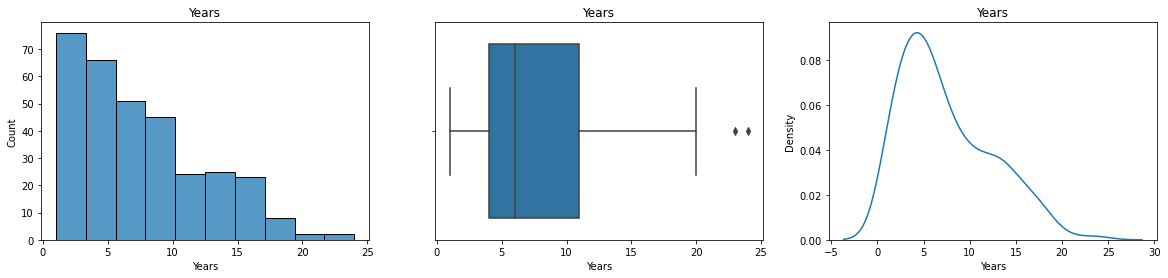

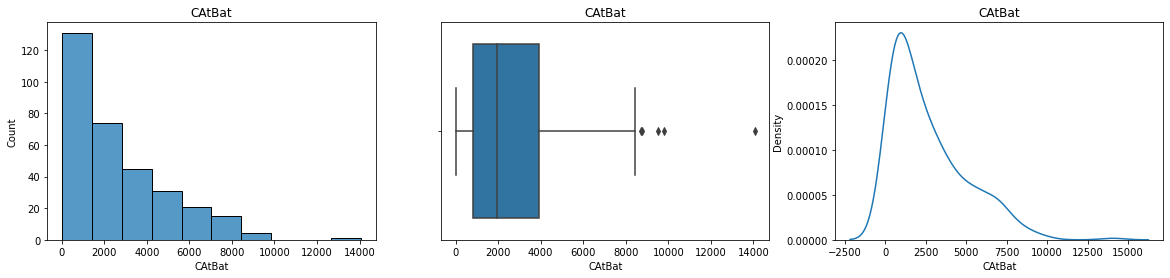

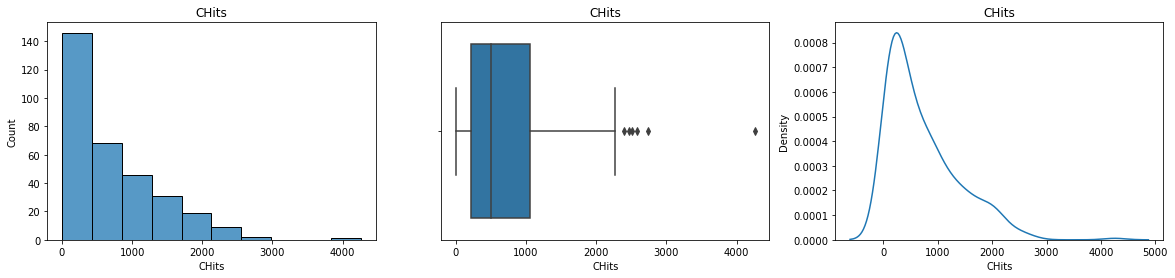

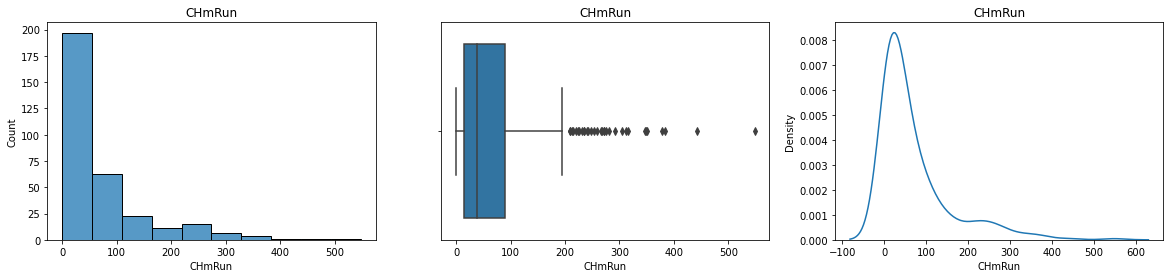

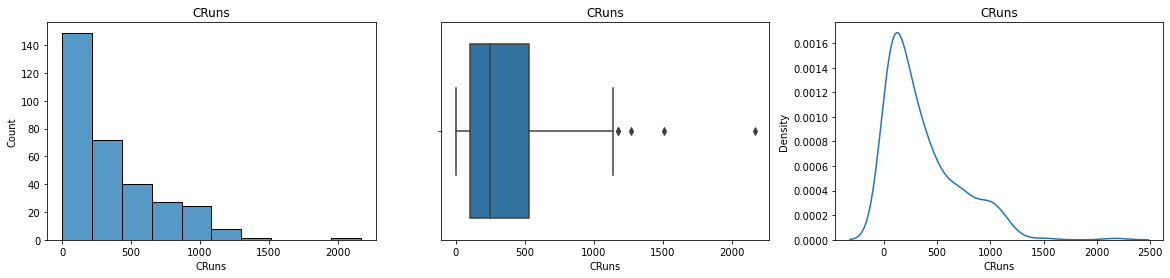

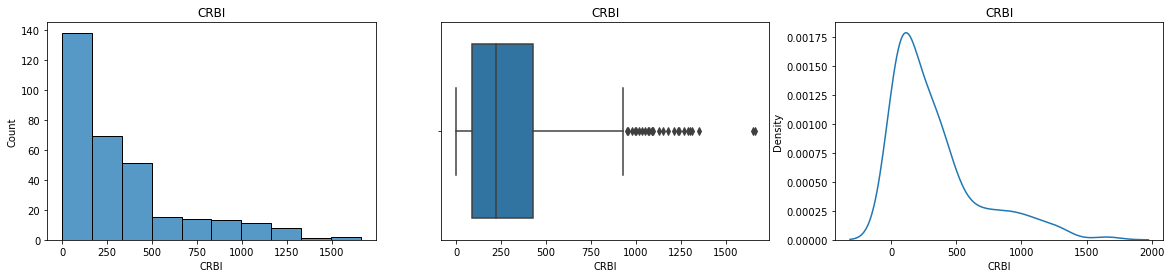

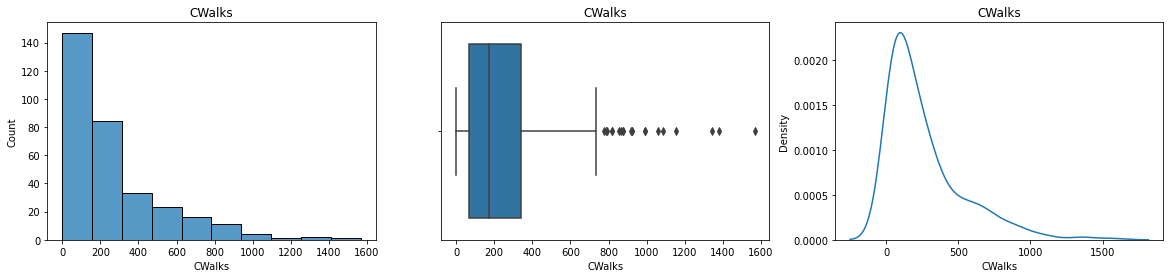

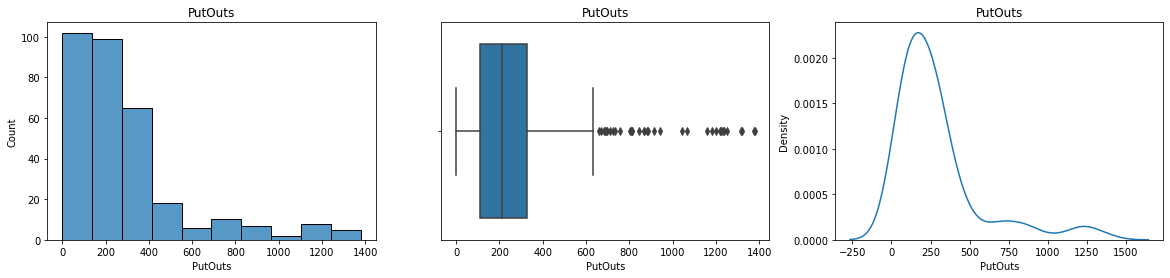

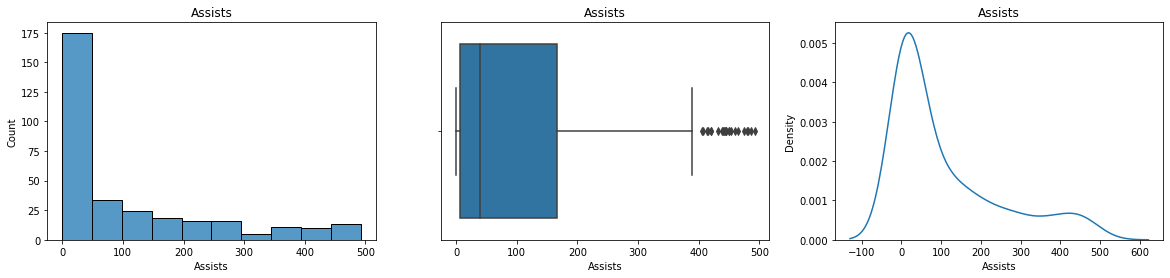

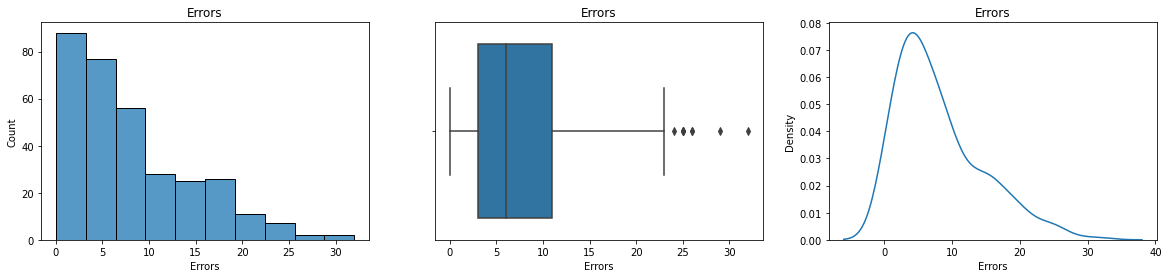

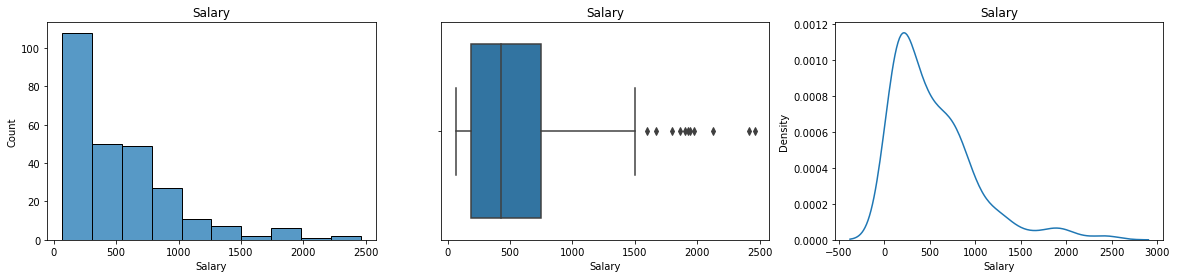

In [145]:
for i in numeric_cols(df):

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
    sns.histplot(df[i], bins=10, ax=axes[0])
    axes[0].set_title(i)
    
    sns.boxplot(df[i], ax=axes[1])
    axes[1].set_title(i)
   
    sns.kdeplot(df[i], ax=axes[2])
    axes[2].set_title(i)
    plt.show()

In [146]:
# correlation analysis
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


In [147]:
def correlation(df, size=[20, 15]):
    f, ax = plt.subplots(figsize= [20,15])
    sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)
    plt.show()

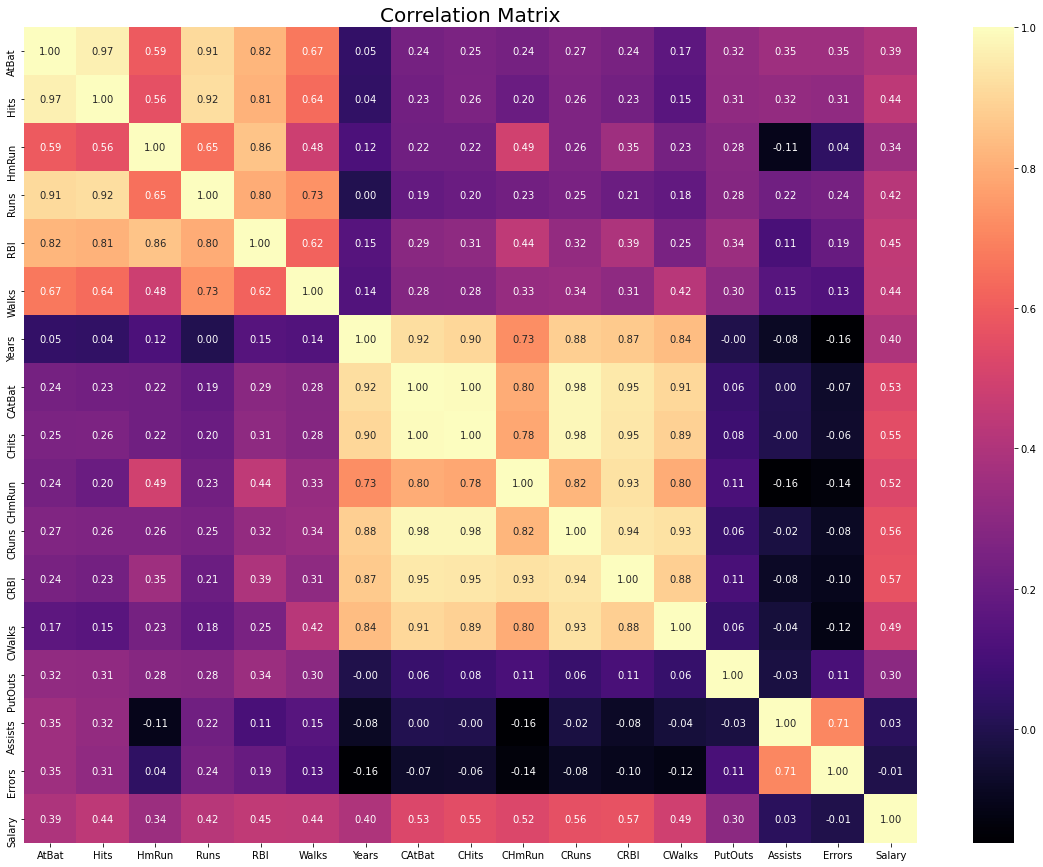

In [148]:
correlation(df)

In [149]:
# Correlation analysis of numerical variables was performed.
def find_corr(df, num_col_names, limit=0.55):
    high_corrs={}
    for col in num_col_names:
        if col=='Salary':
            pass
        else:
            corr=df[[col, 'Salary']].corr().loc[col, 'Salary']
            print(col, corr)
            if abs(corr)>limit:
                high_corrs[col]=corr
    return high_corrs

In [150]:
high_corrs = find_corr(df, numeric_cols(df))

AtBat 0.39477094475973734
Hits 0.43867473786941086
HmRun 0.3430280781546639
Runs 0.41985855930198157
RBI 0.44945708794003414
Walks 0.4438672601629796
Years 0.4006569943826858
CAtBat 0.5261353096237891
CHits 0.54890955903517
CHmRun 0.524930559543593
CRuns 0.5626777110048052
CRBI 0.5669656856176526
CWalks 0.48982203628067983
PutOuts 0.30048035550600527
Assists 0.025436135647346668
Errors -0.00540070150095318


In [151]:
#Two variables with high correlation.
print(high_corrs)

{'CRuns': 0.5626777110048052, 'CRBI': 0.5669656856176526}


<AxesSubplot:xlabel='CRuns', ylabel='Salary'>

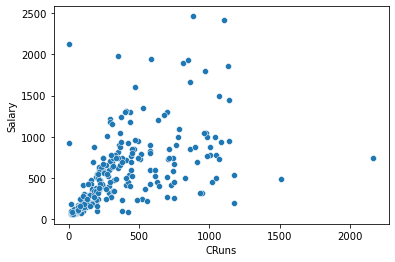

In [152]:
sns.scatterplot(x= df['CRuns'], y=df.Salary)

<AxesSubplot:xlabel='CRBI', ylabel='Salary'>

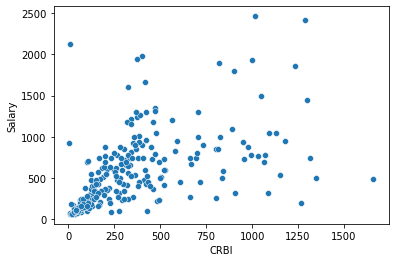

In [153]:
sns.scatterplot(x= df['CRBI'], y=df.Salary)

# Local Outlier Factor

In [167]:
def lof_scores(df):
    clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    clf.fit_predict(df)
    df_scores=clf.negative_outlier_factor_
    sns.boxplot(df_scores)
    plt.show()
    return df_scores
    
def lof(df, df_scores, threshold):
    not_outlier = df_scores >threshold
    value= df[df_scores == threshold]
    outliers = df[~not_outlier] 
    res=outliers.to_records(index=False)
    res[:] = value.to_records(index = False)
    not_outlier_df = df[not_outlier]
    outliers = pd.DataFrame(res, index = df[~not_outlier].index)
    df_res = pd.concat([not_outlier_df, outliers], ignore_index = True)
    return df_res

We will create different data sets for different scenarios that we will apply for salary estimation.

# First option

In [174]:
#drop NA values
df1=df.dropna()
df1.shape

(263, 20)

In [175]:
#Min-Max Scaler
def minmax_scaler(dataframe, col_names, feature_range=(0,1)):
    minmax_scaler = MinMaxScaler(feature_range=feature_range)
    col_names=[col for col in col_names if col !="Salary"]
    dataframe[col_names] = minmax_scaler.fit_transform(dataframe[col_names])
    return dataframe

In [176]:
df1=minmax_scaler(df1, numeric_cols(df1))

In [177]:
df1.isnull().sum().sum()

0

In [178]:
# Variables with 2 categories
def var_two_cat(df):    
    bins_cols=[col for col in df.columns if df[col].dtype=='O' and df[col].nunique()==2]
    return bins_cols

In [179]:
print(var_two_cat(df1))

['League', 'Division', 'NewLeague']


In [180]:
def label_encoder(df, bins_cols):
    for col in bins_cols:
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
    return df

In [181]:
df1=label_encoder(df1, var_two_cat(df1))

In [182]:
df1.name='df1'
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,0.443114,0.337553,0.175,0.184615,0.314050,0.371429,0.565217,0.244406,0.195437,0.125912,0.147480,0.248188,0.238978,1,1,0.458969,0.087398,0.31250,475.0,1
2,0.688623,0.544304,0.450,0.507692,0.595041,0.723810,0.086957,0.114365,0.106538,0.114964,0.102635,0.158816,0.167412,0,1,0.639070,0.166667,0.43750,480.0,0
3,0.714072,0.590717,0.500,0.500000,0.644628,0.352381,0.434783,0.399672,0.369473,0.410584,0.381877,0.504227,0.225559,1,0,0.145243,0.022358,0.09375,500.0,1
4,0.452096,0.362869,0.250,0.300000,0.347107,0.285714,0.043478,0.026863,0.022813,0.021898,0.021267,0.025966,0.020447,1,0,0.584604,0.081301,0.12500,91.5,1
5,0.860778,0.708861,0.100,0.569231,0.421488,0.333333,0.434783,0.312740,0.265522,0.034672,0.230698,0.201087,0.123323,0,1,0.204793,0.855691,0.78125,750.0,0


# Second option

In [183]:
#This is second option and method is fill NA values with mean
df2=df.copy()

In [184]:
#New variables were created with the most appropriate variables according to their proportions.
#The data set includes the data obtained by the players in 1986 and throughout their careers and how many years of experience they have. 
#We add the annual averages of these data and the ratio of the 1986 data to the overall performance.
def new_var(df):
    df['AtBat_new'] = df['AtBat'] / df['CAtBat']
    df['Hits_new'] = df['Hits'] / df['CHits']
    df['HmRun_new'] = (df['HmRun'] / df['CHmRun']).fillna(0)
    df['Runs_new'] = df['Runs'] / df['CRuns']
    df['RBI_new'] = (df['RBI'] / df['CRBI']).fillna(0)
    df['Walks_new'] = (df['Walks'] / df['CWalks']).fillna(0)

    df["CAtBat_rate"] = df["CAtBat"] / df["Years"]
    df["CHits_rate"] = df["CHits"] / df["Years"]
    df["CHmRun_rate"] = df["CHmRun"] / df["Years"]
    df["Cruns_rate"] = df["CRuns"] / df["Years"]
    df["CRBI_rate"] = df["CRBI"] / df["Years"]
    df["CWalks_rate"] = df["CWalks"] / df["Years"]
    
    return df

In [185]:
def new_year(df):
    df['New_Year'] = pd.cut(x=df['Years'], bins=[0, 3, 6, 10, 15, 19, 24], ).astype("O")
    return df

In [186]:
df2=new_year(df2)

<AxesSubplot:>

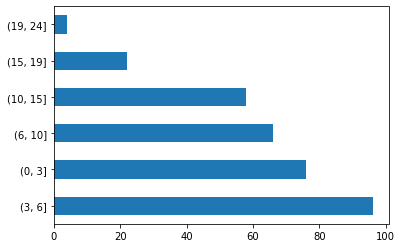

In [187]:
df2['New_Year'].value_counts().plot.barh()

In [188]:
df2.isnull().sum().sum()

59

<AxesSubplot:>

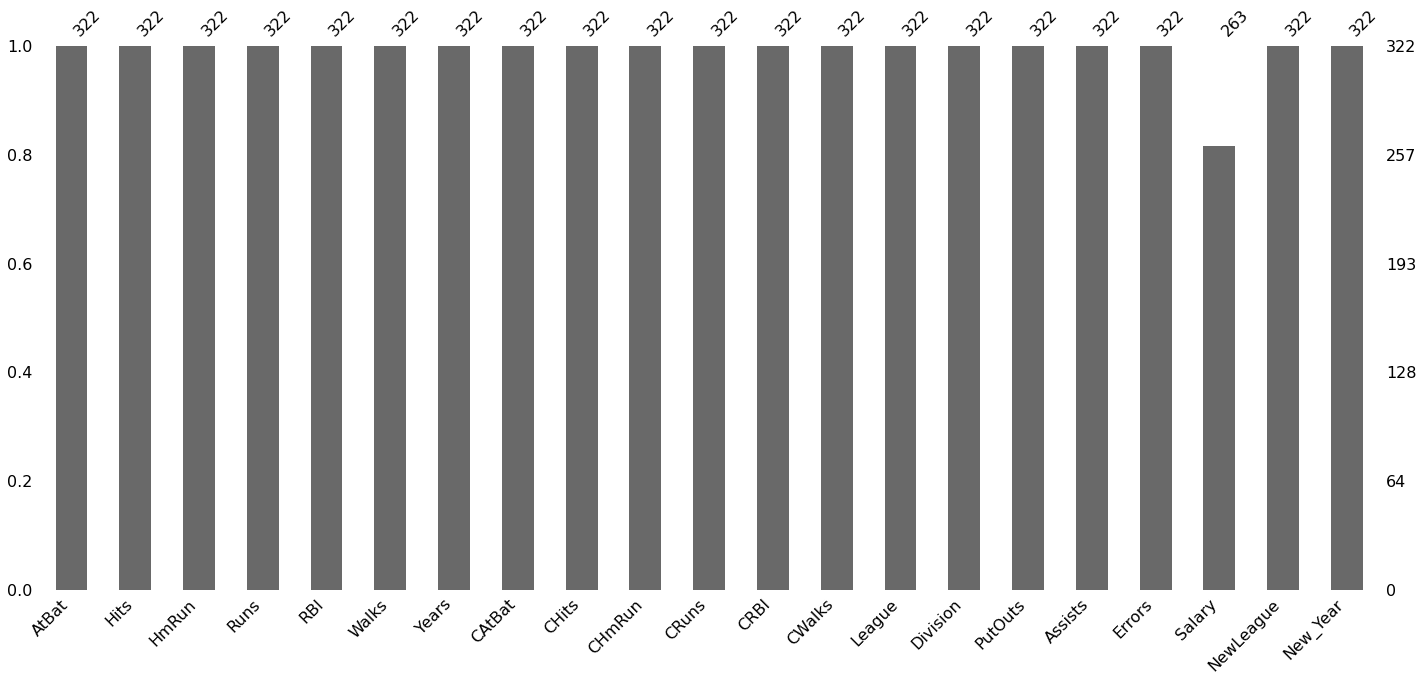

In [189]:
msno.bar(df2)

In [190]:
df2['Salary']=df2['Salary'].fillna(df2.groupby(['New_Year', "League", 'Division'])['Salary'].transform('mean'))

In [191]:
df2.isnull().sum().sum()

0

In [192]:
df2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,New_Year
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,112.5,A,"(0, 3]"
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,"(10, 15]"
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,"(0, 3]"
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,"(10, 15]"
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,"(0, 3]"


In [193]:
df2=minmax_scaler(df2, numeric_cols(df2))

In [194]:
df2=label_encoder(df2, var_two_cat(df2))

In [195]:
df2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,New_Year
0,0.412817,0.274262,0.025,0.230769,0.239669,0.133333,0.000000,0.019524,0.014581,0.001825,...,0.017480,0.008940,0,0,0.323657,0.067073,0.62500,112.5,0,"(0, 3]"
1,0.445604,0.337553,0.175,0.184615,0.314050,0.371429,0.565217,0.244406,0.195437,0.125912,...,0.249548,0.239464,1,1,0.458636,0.087398,0.31250,475.0,1,"(10, 15]"
2,0.690015,0.544304,0.450,0.507692,0.595041,0.723810,0.086957,0.114365,0.106538,0.114964,...,0.160338,0.167944,0,1,0.638607,0.166667,0.43750,480.0,0,"(0, 3]"
3,0.715350,0.590717,0.500,0.500000,0.644628,0.352381,0.434783,0.399672,0.369473,0.410584,...,0.505124,0.226054,1,0,0.145138,0.022358,0.09375,500.0,1,"(10, 15]"
4,0.454545,0.362869,0.250,0.300000,0.347107,0.285714,0.043478,0.026863,0.022813,0.021898,...,0.027728,0.021073,1,0,0.584180,0.081301,0.12500,91.5,1,"(0, 3]"


In [197]:
def one_hot_cols(df): 
    return [col for col in df.columns if 10>=df[col].nunique()>2]
print(one_hot_cols(df2))

['New_Year']


In [198]:
df2 = pd.get_dummies(df2, columns=one_hot_cols(df2), drop_first=True)

In [199]:
df2.head()
df2.name='df2'

# Third option

In [200]:
df3=df.copy()

In [201]:
df3=new_year(df3)

In [202]:
df3=minmax_scaler(df3, numeric_cols(df3))

In [203]:
df3=label_encoder(df3, var_two_cat(df3))

In [204]:
print(one_hot_cols(df3))

['New_Year']


In [205]:
df3 = pd.get_dummies(df3, columns=one_hot_cols(df3), drop_first=True)

In [206]:
df3.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,NewLeague,"New_Year_(3, 6]","New_Year_(6, 10]","New_Year_(10, 15]","New_Year_(15, 19]","New_Year_(19, 24]"
0,0.412817,0.274262,0.025,0.230769,0.239669,0.133333,0.000000,0.019524,0.014581,0.001825,...,0.323657,0.067073,0.62500,NaN,0,0,0,0,0,0
1,0.445604,0.337553,0.175,0.184615,0.314050,0.371429,0.565217,0.244406,0.195437,0.125912,...,0.458636,0.087398,0.31250,475.0,1,0,0,1,0,0
2,0.690015,0.544304,0.450,0.507692,0.595041,0.723810,0.086957,0.114365,0.106538,0.114964,...,0.638607,0.166667,0.43750,480.0,0,0,0,0,0,0
3,0.715350,0.590717,0.500,0.500000,0.644628,0.352381,0.434783,0.399672,0.369473,0.410584,...,0.145138,0.022358,0.09375,500.0,1,0,0,1,0,0
4,0.454545,0.362869,0.250,0.300000,0.347107,0.285714,0.043478,0.026863,0.022813,0.021898,...,0.584180,0.081301,0.12500,91.5,1,0,0,0,0,0


In [208]:
# We fill in the missing observations with the KNN algorithm and create the dataset named 'df_knn_imp':
def knn_imputer(df, n):
    imputer = KNNImputer(n_neighbors = n)
    df_filled = imputer.fit_transform(df)
    df_knn_imp = pd.DataFrame(df_filled,columns = df.columns)
    return df_knn_imp

In [209]:
df3=knn_imputer(df3, 4)
df3.head()
df3.name='df3'

In [210]:
df3.isnull().sum().sum()

0

# Fourth option

In [211]:
#Filling Missing Data with KNN and Suppressing Outliers to create 'df4'
df4=df.copy()

In [212]:
df4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [213]:
df4=new_year(df4)

In [214]:
df4=minmax_scaler(df4, numeric_cols(df4))

In [215]:
df4=label_encoder(df4, var_two_cat(df4))

In [216]:
df4 = pd.get_dummies(df4, columns=one_hot_cols(df4), drop_first=True)

In [217]:
df4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,NewLeague,"New_Year_(3, 6]","New_Year_(6, 10]","New_Year_(10, 15]","New_Year_(15, 19]","New_Year_(19, 24]"
0,0.412817,0.274262,0.025,0.230769,0.239669,0.133333,0.000000,0.019524,0.014581,0.001825,...,0.323657,0.067073,0.62500,NaN,0,0,0,0,0,0
1,0.445604,0.337553,0.175,0.184615,0.314050,0.371429,0.565217,0.244406,0.195437,0.125912,...,0.458636,0.087398,0.31250,475.0,1,0,0,1,0,0
2,0.690015,0.544304,0.450,0.507692,0.595041,0.723810,0.086957,0.114365,0.106538,0.114964,...,0.638607,0.166667,0.43750,480.0,0,0,0,0,0,0
3,0.715350,0.590717,0.500,0.500000,0.644628,0.352381,0.434783,0.399672,0.369473,0.410584,...,0.145138,0.022358,0.09375,500.0,1,0,0,1,0,0
4,0.454545,0.362869,0.250,0.300000,0.347107,0.285714,0.043478,0.026863,0.022813,0.021898,...,0.584180,0.081301,0.12500,91.5,1,0,0,0,0,0


In [218]:
df4=knn_imputer(df4, 4)

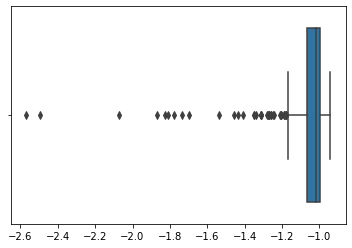

In [219]:
array=np.sort(lof_scores(df4))

array_res=array[array>array[63]]

<AxesSubplot:>

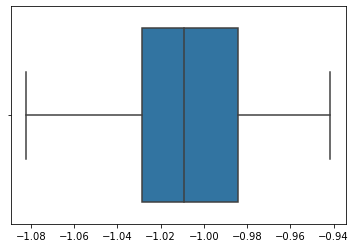

In [220]:
sns.boxplot(array_res)

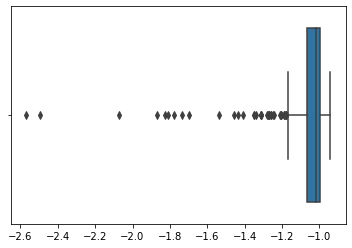

In [221]:
df_scores=lof_scores(df4)
df4=lof(df4, df_scores, np.sort(df_scores)[63])

In [222]:
df4.isnull().sum().sum()

0

In [223]:
df4.name='df4'
df4.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,NewLeague,"New_Year_(3, 6]","New_Year_(6, 10]","New_Year_(10, 15]","New_Year_(15, 19]","New_Year_(19, 24]"
0,0.445604,0.337553,0.175,0.184615,0.314050,0.371429,0.565217,0.244406,0.195437,0.125912,...,0.458636,0.087398,0.31250,475.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.690015,0.544304,0.450,0.507692,0.595041,0.723810,0.086957,0.114365,0.106538,0.114964,...,0.638607,0.166667,0.43750,480.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.715350,0.590717,0.500,0.500000,0.644628,0.352381,0.434783,0.399672,0.369473,0.410584,...,0.145138,0.022358,0.09375,500.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.454545,0.362869,0.250,0.300000,0.347107,0.285714,0.043478,0.026863,0.022813,0.021898,...,0.584180,0.081301,0.12500,91.5,1.0,0.0,0.0,0.0,0.0,0.0
4,0.861401,0.708861,0.100,0.569231,0.421488,0.333333,0.434783,0.312740,0.265522,0.034672,...,0.204644,0.855691,0.78125,750.0,0.0,0.0,0.0,1.0,0.0,0.0


# Fifth option

In [225]:
df5=df.copy()

In [226]:
df5=new_year(df5)
df5=new_var(df5)

In [227]:
df5=label_encoder(df5, var_two_cat(df5))

In [228]:
print(one_hot_cols(df5))

['New_Year']


In [229]:
df5 = pd.get_dummies(df5, columns=one_hot_cols(df5), drop_first=True)

In [230]:
df5=knn_imputer(df5, 4)

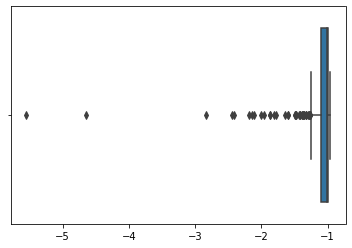

In [231]:
df_scores=lof_scores(df5)

In [232]:
df5=lof(df5, df_scores, np.sort(df_scores)[110])   #90

In [233]:
df5=minmax_scaler(df5, numeric_cols(df5))

In [234]:
df5.isnull().sum().sum()

0

In [235]:
df5.name='df5'
df5.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CHits_rate,CHmRun_rate,Cruns_rate,CRBI_rate,CWalks_rate,"New_Year_(3, 6]","New_Year_(6, 10]","New_Year_(10, 15]","New_Year_(15, 19]","New_Year_(19, 24]"
0,0.717054,0.619565,0.571429,0.575758,0.648148,0.361702,0.588235,0.740108,0.729295,0.509050,...,0.879032,0.740436,0.909865,0.901585,0.413183,0.0,0.0,1.0,0.0,0.0
1,0.906977,0.771739,0.114286,0.666667,0.398148,0.340426,0.588235,0.574797,0.520114,0.042986,...,0.609265,0.062526,0.530368,0.337427,0.203645,0.0,0.0,1.0,0.0,0.0
2,0.114341,0.054348,0.028571,0.151515,0.000000,0.191489,0.058824,0.006504,0.003786,0.002262,...,0.058745,0.018100,0.140426,0.015453,0.122449,0.0,0.0,0.0,0.0,0.0
3,0.532946,0.353261,0.485714,0.414141,0.537037,0.659574,0.705882,0.682927,0.614292,0.572398,...,0.605650,0.704490,0.718822,0.806147,0.909225,0.0,0.0,1.0,0.0,0.0
4,0.868217,0.717391,0.600000,1.000000,0.620370,0.595745,0.529412,0.605014,0.599148,0.203620,...,0.790534,0.325792,0.845106,0.582870,0.652581,0.0,1.0,0.0,0.0,0.0


# Model

In [236]:
def reg_model(df, Y, algo, test_size=0.20):
    X=df.drop(Y, axis=1)
    Y=df[[Y]]
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=test_size, random_state=42)
    model=algo.fit(X_train, Y_train)
    Y_train_pred=model.predict(X_train)
    train_rmse=np.sqrt(mean_squared_error(Y_train, Y_train_pred))
    print(df.name)
    print(type(model).__name__)
    print("Train RMSE: {}".format(train_rmse))
    
    Y_test_pred=model.predict(X_test)
    test_rmse=np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    print("Test RMSE: {}".format(test_rmse))
    print('###################################')
    return (df.name, type(model).__name__, train_rmse, test_rmse)

In [237]:
models=[LinearRegression(), Ridge(), Lasso(), ElasticNet()]
dataframes=[df1, df2, df3, df4, df5]
results={'frame':[], 'model':[], 'train_error':[], 'test_error':[]}

In [238]:
for frame in dataframes:
    for model in models:
        res=reg_model(frame, 'Salary', model)
        results['frame'].append(res[0])
        results['model'].append(res[1])
        results['train_error'].append(res[2])
        results['test_error'].append(res[3])

df1
LinearRegression
Train RMSE: 291.828812790208
Test RMSE: 358.1680408645129
###################################
df1
Ridge
Train RMSE: 306.0681675386166
Test RMSE: 377.48353376239703
###################################
df1
Lasso
Train RMSE: 303.4951085723638
Test RMSE: 376.1889656250348
###################################
df1
ElasticNet
Train RMSE: 385.6781002908525
Test RMSE: 391.6488678162335
###################################
df2
LinearRegression
Train RMSE: 253.88825905323435
Test RMSE: 312.85406077370914
###################################
df2
Ridge
Train RMSE: 269.22824361204596
Test RMSE: 296.983021988357
###################################
df2
Lasso
Train RMSE: 265.2125034135267
Test RMSE: 305.85971620506695
###################################
df2
ElasticNet
Train RMSE: 358.30303832163884
Test RMSE: 388.40093967050836
###################################
df3
LinearRegression
Train RMSE: 238.95036733198097
Test RMSE: 298.8941472532992
###################################
df3
Ri

In [239]:
results=pd.DataFrame(results)
results

,frame,model,train_error,test_error
0,df1,LinearRegression,291.828813,358.168041
1,df1,Ridge,306.068168,377.483534
2,df1,Lasso,303.495109,376.188966
3,df1,ElasticNet,385.678100,391.648868
4,df2,LinearRegression,253.888259,312.854061
5,df2,Ridge,269.228244,296.983022
6,df2,Lasso,265.212503,305.859716
7,df2,ElasticNet,358.303038,388.400940
8,df3,LinearRegression,238.950367,298.894147
9,df3,Ridge,256.132374,290.664184


<AxesSubplot:xlabel='frame', ylabel='test_error'>

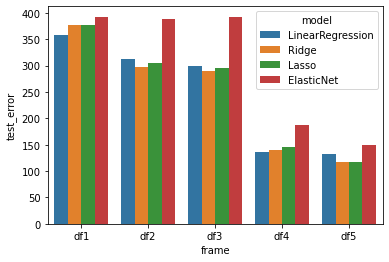

In [240]:
sns.barplot(x=results['frame'], y=results['test_error'], hue=results['model'])

# MODEL TUNING

In [241]:
def model_tuning(df, Y, algo_cv, algo, alphas, test_size=0.20, cv=10):
    X=df.drop(Y, axis=1)
    Y=df[[Y]]
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=test_size)
    model_cv=algo_cv(alphas=alphas, cv=cv)
    model_cv.fit(X_train, Y_train)
    model_tuned=algo(alpha=model_cv.alpha_)
    model_tuned.fit(X_train, Y_train)
    print(df.name)
    print(type(model_tuned).__name__)
    Y_train_pred=model_tuned.predict(X_train)
    train_rmse=np.sqrt(mean_squared_error(Y_train, Y_train_pred))
    print("Train RMSE:{}".format(train_rmse))
    Y_test_pred=model_tuned.predict(X_test)
    test_rmse=np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    print("Test RMSE:{}".format(test_rmse))
    print('#####################')
    return (df.name, type(model_tuned).__name__, train_rmse, test_rmse)

In [242]:
models={Ridge: RidgeCV, Lasso:LassoCV, ElasticNet:ElasticNetCV}
results_tuned={'frame':[], 'model':[], 'train_rmse':[], 'test_rmse':[]}
alphas = [0.1,0.01, 0.005, 0.05, 0.001,0.2,0.3,0.5,0.8,0.9,1]

In [243]:
for frame in dataframes:
    for model in models:
        res=model_tuning(frame, 'Salary', models[model], model, alphas)
        results_tuned['frame'].append(res[0])
        results_tuned['model'].append(res[1])
        results_tuned['train_rmse'].append(res[2])
        results_tuned['test_rmse'].append(res[3])

df1
Ridge
Train RMSE:306.0681675386166
Test RMSE:377.48353376239703
#####################
df1
Lasso
Train RMSE:295.14285174787545
Test RMSE:358.6682794341792
#####################
df1
ElasticNet
Train RMSE:313.4620668051373
Test RMSE:383.20264994499706
#####################
df2
Ridge
Train RMSE:263.42659319933796
Test RMSE:300.13428277750603
#####################
df2
Lasso
Train RMSE:254.07648960625593
Test RMSE:311.51371554515015
#####################
df2
ElasticNet
Train RMSE:257.8016966929137
Test RMSE:306.2001694765441
#####################
df3
Ridge
Train RMSE:246.71387393675448
Test RMSE:293.22831384190056
#####################
df3
Lasso
Train RMSE:239.15747301886358
Test RMSE:298.0053789983328
#####################
df3
ElasticNet
Train RMSE:243.66040712964383
Test RMSE:294.99368229223495
#####################
df4
Ridge
Train RMSE:150.6270139718495
Test RMSE:140.27098624592918
#####################
df4
Lasso
Train RMSE:145.65139328122646
Test RMSE:135.40500070183265
#############

In [244]:
results_tuned=pd.DataFrame(results_tuned)
results_tuned

,frame,model,train_rmse,test_rmse
0,df1,Ridge,306.068168,377.483534
1,df1,Lasso,295.142852,358.668279
2,df1,ElasticNet,313.462067,383.202650
3,df2,Ridge,263.426593,300.134283
4,df2,Lasso,254.076490,311.513716
5,df2,ElasticNet,257.801697,306.200169
6,df3,Ridge,246.713874,293.228314
7,df3,Lasso,239.157473,298.005379
8,df3,ElasticNet,243.660407,294.993682
9,df4,Ridge,150.627014,140.270986


In [110]:
def light_gbm(df, Y):
    df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    lgbm=LGBMRegressor()
    X=df.drop(Y, axis=1)
    Y=df[[Y]]
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.20)
    lgbm.fit(X_train, Y_train)

    Y_pred=lgbm.predict(X_test,num_iteration=lgbm.best_iteration_)

    print((np.sqrt(mean_squared_error(Y_test, Y_pred))))

In [111]:
light_gbm(df4, 'Salary')

123.0732987827868


In [112]:
light_gbm(df5, 'Salary')

121.29981655513015


In [113]:
def light_gbm_tuning(df, Y):
    df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X=df.drop(Y, axis=1)
    Y=df[[Y]]
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.20)
    lgbm_grid={
    'colsample_bytree':[0.4, 0.5, 0.6, 0.9, 1],
    'learning_rate':[0.01, 0.1, 0.5, 1],
           'n_estimators':[20, 40, 100, 200, 500, 1000],
           'max_depth':[1, 2, 3, 4, 5, 6, 7, 8]}

    lgbm=LGBMRegressor()

    lgbm_cv_model=GridSearchCV(lgbm, lgbm_grid, cv=10,
                           n_jobs=-1, verbose=2)

    lgbm_cv_model.fit(X_train, Y_train)

    #lgbm_cv_model.best_params_
    lgbm_tuned=LGBMRegressor(learning_rate=0.1,
                         max_depth=2,
                         n_estimators=100,
                         colsample_bytree=0.9)

    lgbm_tuned.fit(X_train, Y_train)

    Y_pred=lgbm_tuned.predict(X_test)

    print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

In [114]:
light_gbm_tuning(df4, 'Salary')

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 2352 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 3812 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 5592 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7700 tasks      | elapsed:  1.7min


123.57524846077584


[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  2.2min finished


In [115]:
light_gbm_tuning(df5, 'Salary')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 595 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 3908 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 5688 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7796 tasks      | elapsed:  1.8min


116.55558107862244


[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  2.3min finished
